In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler

from datetime import datetime, timezone,timedelta
from ta.utils import dropna
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import KAMAIndicator, PercentagePriceOscillator, PercentageVolumeOscillator, ROCIndicator, RSIIndicator, StochasticOscillator
from ta.trend import MACD, ADXIndicator, AroonIndicator
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator

In [42]:
end = datetime.today() - timedelta(days=46)
start = datetime(2000, 9, 1)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df = df[30:len(df)]
df = df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
df.rename(columns = {"Close": "price"}, inplace=True)
df

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,price,kama,ppo,pvo,roc,macd,rsi,obv,adi,adx,aroon,stoo,boll_mavg,atr
Date,,,,,,,,,,,,,,
2015-09-05,1.295830,1.367693,-4.785612,-22.036810,13.650357,-0.060538,42.934435,1.255011e+06,-1.161445e+06,21.110482,10.0,69.992822,1.274445,0.229501
2015-09-06,1.246650,1.365338,-4.673776,-23.501877,7.471673,-0.057863,41.026635,7.659970e+05,-1.523198e+06,20.987104,-25.0,55.282354,1.282425,0.217939
2015-09-07,1.242430,1.362696,-4.543033,-25.229434,8.253901,-0.055215,40.858862,3.381050e+05,-1.755700e+06,20.899015,-25.0,54.020087,1.281603,0.206069
2015-09-08,1.206510,1.351718,-4.617088,-27.242097,1.269949,-0.054484,39.382582,-2.864300e+04,-2.064035e+06,20.927832,-20.0,31.202602,1.268683,0.195539
2015-09-09,1.165770,1.321194,-4.882203,-24.582975,-1.418959,-0.055514,37.718022,-6.914250e+05,-2.267168e+06,21.209244,-15.0,16.423030,1.257207,0.187673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-21,1121.570923,1205.095650,7.805180,8.704535,-12.450954,72.900372,52.827792,1.012048e+12,1.221226e+12,35.729308,90.0,38.757796,1167.366519,136.061697
2021-01-22,1236.512207,1206.445263,7.097784,8.786998,-2.038785,67.617759,58.461031,1.055966e+12,1.251418e+12,33.791964,85.0,61.411796,1190.465381,142.420937
2021-01-23,1230.990601,1206.975004,6.412212,5.044515,12.919856,62.259214,58.102078,1.028712e+12,1.247187e+12,31.997002,80.0,60.323532,1203.239526,137.337857


In [44]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

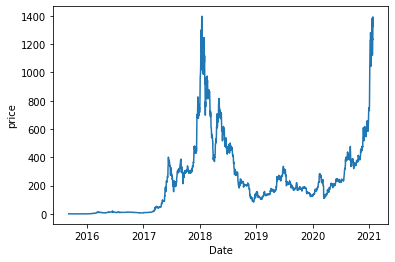

In [45]:
sns.lineplot(x=df.index, y="price", data=df);

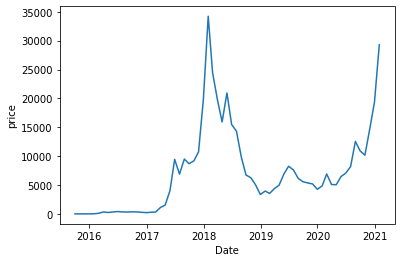

In [46]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="price", data=df_by_month);

In [47]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(1768, 17) (197, 17)


In [48]:
f_columns = ['kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr']

f_transformer = RobustScaler()
price_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
price_transformer = price_transformer.fit(train[['price']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['price'] = price_transformer.transform(train[['price']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['price'] = price_transformer.transform(test[['price']])

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [49]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [50]:
time_steps = 30

X_train, y_train = create_dataset(train, train.price, time_steps)
X_test, y_test = create_dataset(test, test.price, time_steps)

print(X_train.shape, y_train.shape)

(1738, 30, 17) (1738,)


In [51]:
X_test.shape

(167, 30, 17)

In [52]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
49/49 [==============================] - 4s 32ms/step - loss: 0.4373 - val_loss: 0.4066
Epoch 2/30
49/49 [==============================] - 1s 21ms/step - loss: 0.4576 - val_loss: 1.0453
Epoch 3/30
49/49 [==============================] - 1s 21ms/step - loss: 0.2482 - val_loss: 0.6454
Epoch 4/30
49/49 [==============================] - 1s 21ms/step - loss: 0.2523 - val_loss: 0.3583
Epoch 5/30
49/49 [==============================] - 1s 21ms/step - loss: 0.2718 - val_loss: 0.1772
Epoch 6/30
49/49 [==============================] - 1s 22ms/step - loss: 0.2388 - val_loss: 0.0801
Epoch 7/30
49/49 [==============================] - 1s 22ms/step - loss: 0.1891 - val_loss: 0.0569
Epoch 8/30
49/49 [==============================] - 1s 22ms/step - loss: 0.1479 - val_loss: 0.0598
Epoch 9/30
49/49 [==============================] - 1s 21ms/step - loss: 0.1299 - val_loss: 0.0543
Epoch 10/30
49/49 [==============================] - 1s 22ms/step - loss: 0.0763 - val_loss: 0.0715
Epoch 11/

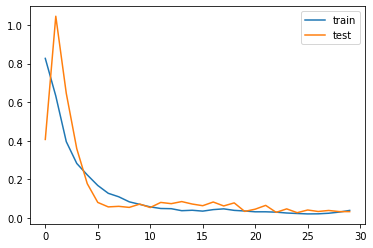

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_train_inv = price_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = price_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = price_transformer.inverse_transform(y_pred)

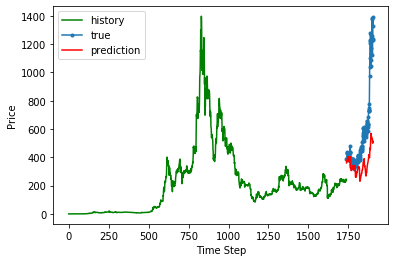

In [60]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

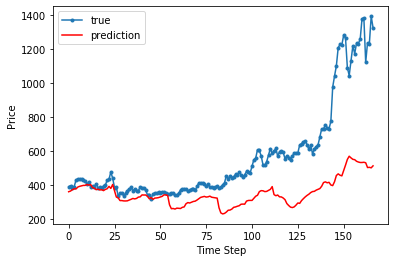

In [58]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [59]:
end = datetime.today()
start = datetime.today() - timedelta(days=56)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

df = df[27:60]
df =  df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
df.rename(columns = {"Close": "price"}, inplace=True)
predict =  df.iloc[:len(df)]

f_columns = ['kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr']

f_transformer = RobustScaler()
price_transformer = RobustScaler()

price_transformer = price_transformer.fit(predict[['price']])

f_transformer = f_transformer.fit(predict[f_columns].to_numpy())

predict.loc[:, f_columns] = f_transformer.transform(predict[f_columns].to_numpy())
predict['price'] = price_transformer.transform(predict[['price']])

Xs = []
v = predict.values
Xs.append(v)

X_predict= np.array(Xs)

X_predict.shape

y_predicted = model.predict(X_predict)

y_predicted_inv = price_transformer.inverse_transform(y_predicted)

y_predicted_inv

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


array([[1749.7507]], dtype=float32)